In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install --upgrade gdown

In [4]:
!gdown 1oL3av183Jae-0UO-ZTR8wErPoHv-zQRP

Downloading...
From: https://drive.google.com/uc?id=1oL3av183Jae-0UO-ZTR8wErPoHv-zQRP
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 53.2MB/s]


### Data Loading

In [5]:
data = pd.read_csv("Ecom_CRM_analysis.csv", encoding= 'latin-1', parse_dates= ['InvoiceDate'])

### Dataset Description:

●   The dataset encompasses transactions from **01/12/2010 to 09/12/2011** for a non-store online retail business based and registered in the UK. Specializing in distinctive all-occasion gifts, the company's clientele includes a significant number of wholesale customers.


**Variable Description**

1.  **InvoiceNo:** Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
2.  **StockCode:** Product code that consists 5 digits.
3.  **Description:** Product name.
4.  **Quantity:** The quantities of each product per transaction.
5.  **InvoiceDate:** This represents the day and time when each transaction was generated.
6.  **UnitPrice:** Product price per unit.
7.  **CustomerID:** Customer number that consists 5 digits. Each customer has a unique customer ID.
8.  **Country:** Name of the country where each customer resides.

**Note:**

●   A negative quantity in this data set represents a "return transaction" instead of a "purchase transaction".

●   Transactions where the unit price is zero potentially indicate a free item.




### Data Exploration

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
data.shape

(541909, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Null Value Detection

In [10]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [11]:
missing_percentage= data.isnull().sum() * 100/ len(data)
print(missing_percentage)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


<Axes: >

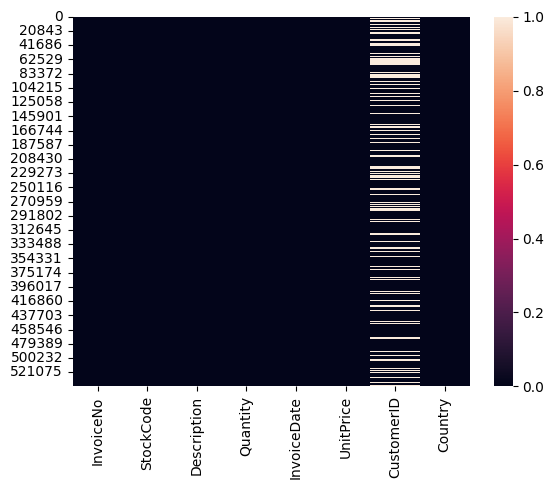

In [12]:
# Visualization of Null Values

sns.heatmap(data= data.isnull())

### Handling Null Values

In [13]:
data['Description'].fillna('Unknown Product', inplace=True)

#### -  Dropping rows with missing customer_Id is recommended for customer-centric analysis to ensure data integrity

In [14]:
#  dropping rows with missing customer_Id is recommended for customer-centric analysis to ensure data integrity

data.dropna(subset=['CustomerID'], inplace=True)

In [15]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [16]:
data.shape

(406829, 8)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Feature Extraction

In [18]:
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth']= data['InvoiceDate'].dt.month_name()
data['InvoiceDay'] = data['InvoiceDate'].dt.day
data['InvoiceTime_AM_PM'] = data['InvoiceDate'].dt.strftime('%I:%M %p')

In [19]:
data['Is_Cancelled'] = data['InvoiceNo'].str.startswith('C')
data['Is_Free_Item'] = data['UnitPrice'] == 0
data['Is_Return'] = data['Quantity'] < 0
data['Total_price']= data['Quantity'] * data['UnitPrice']


In [20]:
data['purchase_transaction'] = data['Total_price'].where(data['Total_price'] > 0, other=0)
data['return_transaction'] = data['Total_price'].where(data['Total_price'] < 0, other=0)


In [21]:
# Create a new column for purchased quantities, setting returns to 0
data['purchased_quantity'] = data['Quantity'].where(data['Quantity'] > 0, other=0)

# Create a new column for returned quantities, setting purchases to 0 and taking absolute values for clarity
data['returned_quantity'] = data['Quantity'].where(data['Quantity'] < 0, other=0).abs()


In [22]:
data.drop(['Total_price', 'Quantity'], axis=1, inplace= True)

In [23]:
data.sample(5)

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime_AM_PM,Is_Cancelled,Is_Free_Item,Is_Return,purchase_transaction,return_transaction,purchased_quantity,returned_quantity
239322,558043,22908,PACK OF 20 NAPKINS RED APPLES,2011-06-24 13:28:00,0.72,13425.0,United Kingdom,2011,June,24,01:28 PM,False,False,False,69.12,0.0,96,0
223162,556474,22386,JUMBO BAG PINK POLKADOT,2011-06-12 12:01:00,2.08,16007.0,United Kingdom,2011,June,12,12:01 PM,False,False,False,2.08,0.0,1,0
416460,572552,85227,SET OF 6 3D KIT CARDS FOR KIDS,2011-10-24 17:07:00,1.63,14096.0,United Kingdom,2011,October,24,05:07 PM,False,False,False,4.89,0.0,3,0
224614,556538,84978,HANGING HEART JAR T-LIGHT HOLDER,2011-06-13 12:42:00,1.25,15845.0,United Kingdom,2011,June,13,12:42 PM,False,False,False,15.00,0.0,12,0
128573,547357,22860,EASTER TIN CHICKS PINK DAISY,2011-03-22 12:15:00,1.65,17613.0,United Kingdom,2011,March,22,12:15 PM,False,False,False,9.90,0.0,6,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceNo             406829 non-null  object        
 1   StockCode             406829 non-null  object        
 2   Description           406829 non-null  object        
 3   InvoiceDate           406829 non-null  datetime64[ns]
 4   UnitPrice             406829 non-null  float64       
 5   CustomerID            406829 non-null  float64       
 6   Country               406829 non-null  object        
 7   InvoiceYear           406829 non-null  int32         
 8   InvoiceMonth          406829 non-null  object        
 9   InvoiceDay            406829 non-null  int32         
 10  InvoiceTime_AM_PM     406829 non-null  object        
 11  Is_Cancelled          406829 non-null  bool          
 12  Is_Free_Item          406829 non-null  bool          
 13  Is_R

In [25]:
data['InvoiceYear'] = data['InvoiceYear'].astype('category')
data['InvoiceMonth'] = data['InvoiceMonth'].astype('category')
data['InvoiceDay'] = data['InvoiceDay'].astype('category')
data['CustomerID'] = data['CustomerID'].astype('category')
data['StockCode'] = data['StockCode'].astype('category')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceNo             406829 non-null  object        
 1   StockCode             406829 non-null  category      
 2   Description           406829 non-null  object        
 3   InvoiceDate           406829 non-null  datetime64[ns]
 4   UnitPrice             406829 non-null  float64       
 5   CustomerID            406829 non-null  category      
 6   Country               406829 non-null  object        
 7   InvoiceYear           406829 non-null  category      
 8   InvoiceMonth          406829 non-null  category      
 9   InvoiceDay            406829 non-null  category      
 10  InvoiceTime_AM_PM     406829 non-null  object        
 11  Is_Cancelled          406829 non-null  bool          
 12  Is_Free_Item          406829 non-null  bool          
 13  Is_R

### Checking Duplicate Values

In [27]:
data.duplicated().sum()

5225

In [28]:
data= data.drop_duplicates()

In [29]:
data.duplicated().sum()

0

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   InvoiceNo             401604 non-null  object        
 1   StockCode             401604 non-null  category      
 2   Description           401604 non-null  object        
 3   InvoiceDate           401604 non-null  datetime64[ns]
 4   UnitPrice             401604 non-null  float64       
 5   CustomerID            401604 non-null  category      
 6   Country               401604 non-null  object        
 7   InvoiceYear           401604 non-null  category      
 8   InvoiceMonth          401604 non-null  category      
 9   InvoiceDay            401604 non-null  category      
 10  InvoiceTime_AM_PM     401604 non-null  object        
 11  Is_Cancelled          401604 non-null  bool          
 12  Is_Free_Item          401604 non-null  bool          
 13  Is_R

In [31]:
data.describe()

,InvoiceDate,UnitPrice,purchase_transaction,return_transaction,purchased_quantity,returned_quantity
count,401604,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,2011-07-10 12:08:23.848567552,3.474064,22.129284,-1.515646,12.863134,0.679861
min,2010-12-01 08:26:00,0.000000,0.000000,-168469.600000,0.000000,0.000000
25%,2011-04-06 15:02:00,1.250000,4.250000,0.000000,2.000000,0.000000
50%,2011-07-29 15:40:00,1.950000,11.700000,0.000000,5.000000,0.000000
75%,2011-10-20 11:58:30,3.750000,19.800000,0.000000,12.000000,0.000000
max,2011-12-09 12:50:00,38970.000000,168469.600000,0.000000,80995.000000,80995.000000
std,NaN,69.764035,307.646110,300.815263,179.581848,174.282725


### Outlier Detection

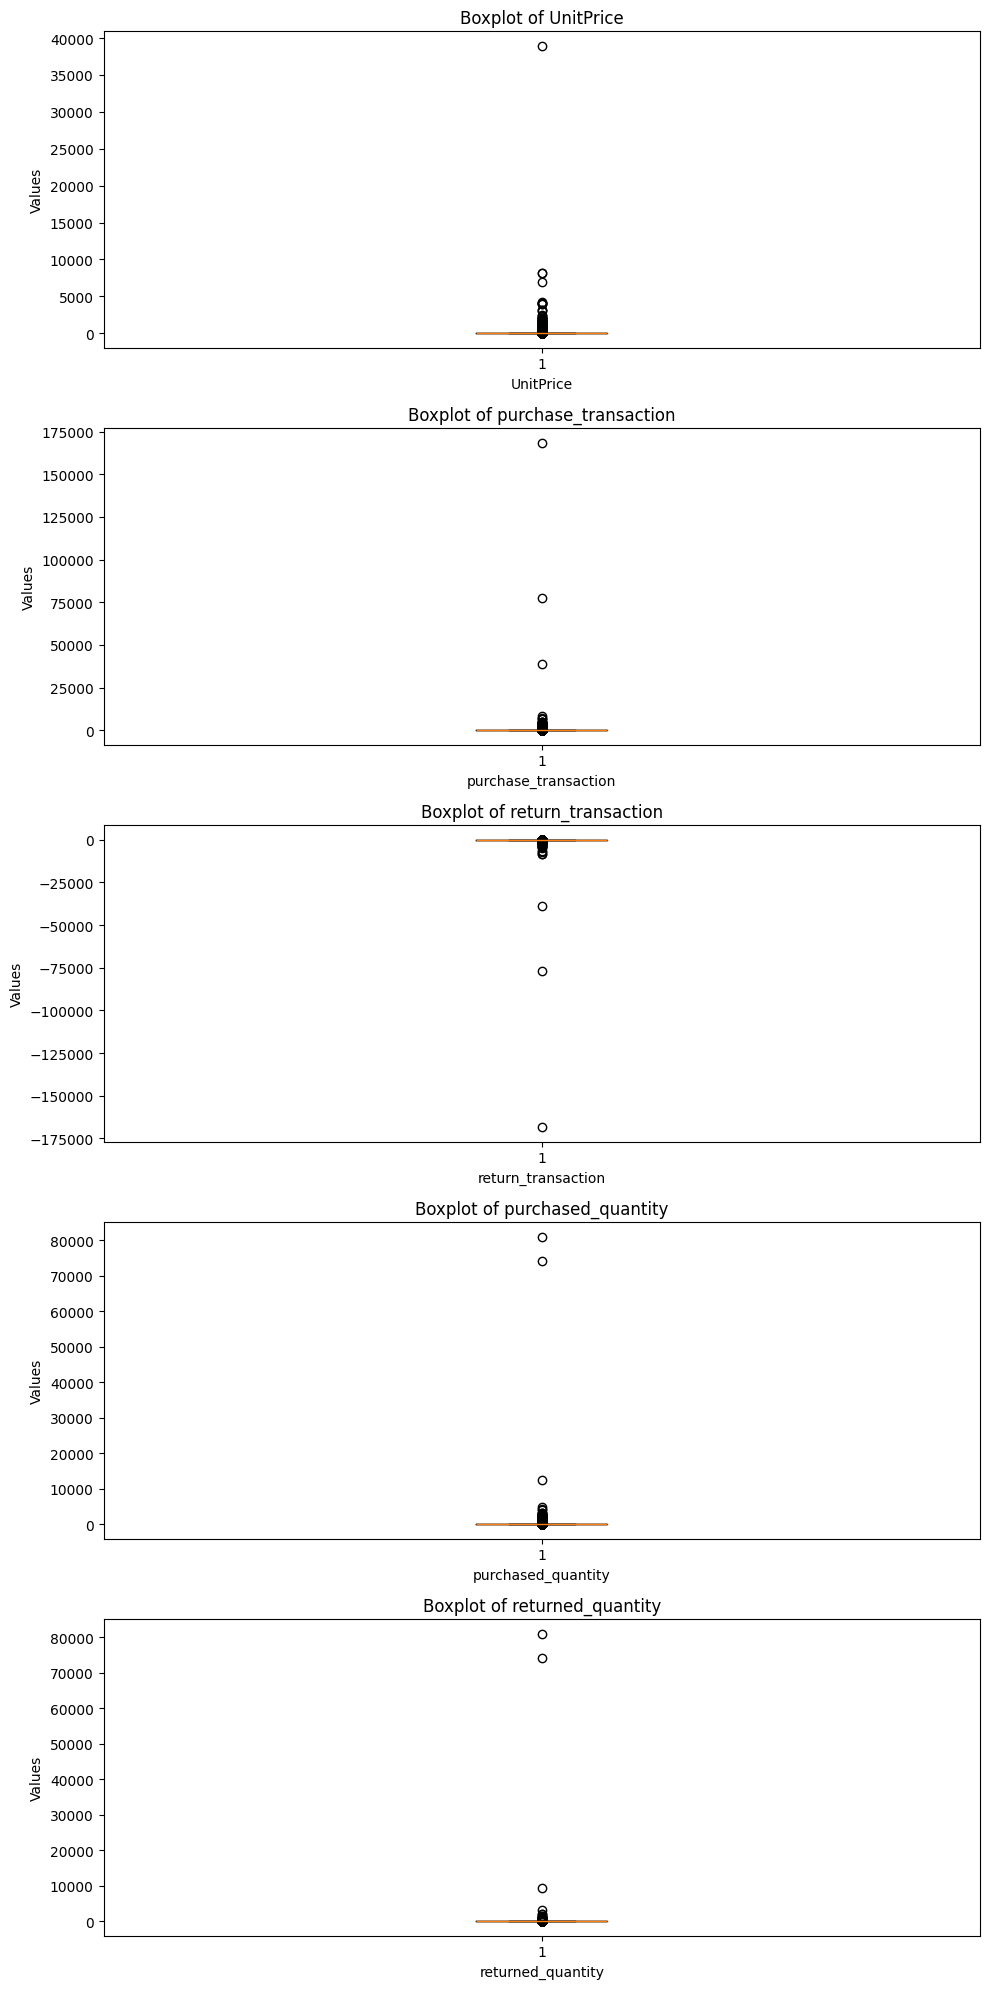

In [32]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Plot box plots for each numerical column to check for outliers
plt.figure(figsize=(10, 20))

for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(len(numerical_data.columns), 1, i)  # Create a subplot for each column
    plt.boxplot(numerical_data[column].dropna())  # Drop NaNs to avoid errors
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

- Original dataset size is 401,568 rows, which would be reduced to 302,987 rows if the outliers are removed.
This means about 25% of the data would be removed (nearly 100,000 rows). This is a significant amount of data, it could potentially reduce the richness and representativeness of your analysis, especially if the removed data points carry important customer or product information.Hence, the outliers are not being removed.



- Also, in e-commerce, high transaction values or large quantities are often legitimate (e.g., bulk purchases by wholesale customers or high-value items).
The presence of such outliers might represent typical business behavior, and removing them could erase valuable insights about high-value customers or peak purchasing trends.


### Exploratory Data Analysis

#### Univariate Analysis

In [33]:
data['UnitPrice'].describe()

,UnitPrice
count,401604.000000
mean,3.474064
std,69.764035
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,38970.000000


#### Insights

- **High Variance in Prices:**

The mean unit price is 3.47, but the standard deviation is 69.76, indicating a high variance in pricing across products.
The wide range of values (from 0 to 38,970) suggests that there are outliers or a few extremely high-priced items skewing the distribution.

- **Zero-Priced Items:**

The minimum price is 0, which might represent items given away for free, such as promotional or complimentary items. These should be examined separately to avoid skewing insights from actual sales transactions.

- **Outliers:**

The maximum unit price is 38,970, which is far above the 75th percentile (3.75). This extreme value may be due to an error, a bulk purchase, or a specialty item.
Examining items in the highest percentile (e.g., above the 99th percentile) could help identify whether these values represent errors or true high-value items.

- **Skewed Distribution:**

The unit price distribution is highly right-skewed (with a few very high values pulling the average up).
The median price (50th percentile) is 1.95, which is much closer to the lower end of the range, highlighting that most items are relatively low-priced.

In [34]:
data['Description'].describe()

,Description
count,401604
unique,3896
top,WHITE HANGING HEART T-LIGHT HOLDER
freq,2058


#### Insights

- **Unique Products:**

There are 3,896 unique product descriptions among 401,604 transactions, indicating a wide variety of products offered by the business.

- **Most Popular Product:**

The most frequently sold product is "WHITE HANGING HEART T-LIGHT HOLDER", with 2,058 occurrences.
This suggests that this product is highly popular among customers, potentially due to its appeal, pricing, or utility.

- **Product Distribution:**

The difference between the total count of transactions (401,604) and the number of unique products (3,896) highlights that some products are sold much more frequently than others. The product mix likely has a long tail, where a few items dominate sales while many others have lower turnover.

- **Diverse Catalog:**

The large number of unique products indicates a diverse catalog. This variety could cater to a wide range of customer preferences but may also pose challenges in inventory management and marketing focus.


In [35]:
data['CustomerID'].describe()

,CustomerID
count,401604.0
unique,4372.0
top,17841.0
freq,7812.0


In [36]:
data['CustomerID'].value_counts().head()

,count
CustomerID,
17841.0,7812
14911.0,5898
14096.0,5128
12748.0,4459
14606.0,2759


#### **Insights:**

---



- **Total Customers:**

There are 4,372 unique customers among 401,604 transactions, indicating repeat purchases from many customers.

- **Most Frequent Customer:**

The customer with ID 17841.0 has the highest transaction frequency, making 7,812 purchases. This indicates a highly engaged or loyal customer.

- **Top 5 Customers:**

The top 5 customers (IDs: 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0) collectively account for a significant portion of transactions:

Customer 14911.0 made 5,898 purchases.

Customer 14096.0 made 5,128 purchases.

Customer 12748.0 made 4,459 purchases.

Customer 14606.0 made 2,759 purchases.

This shows the existence of high-value customers who drive a substantial part of the business.

- **Customer Engagement:**

With such a high frequency of transactions from certain customers, these individuals likely contribute significantly to revenue and may represent a loyal segment.

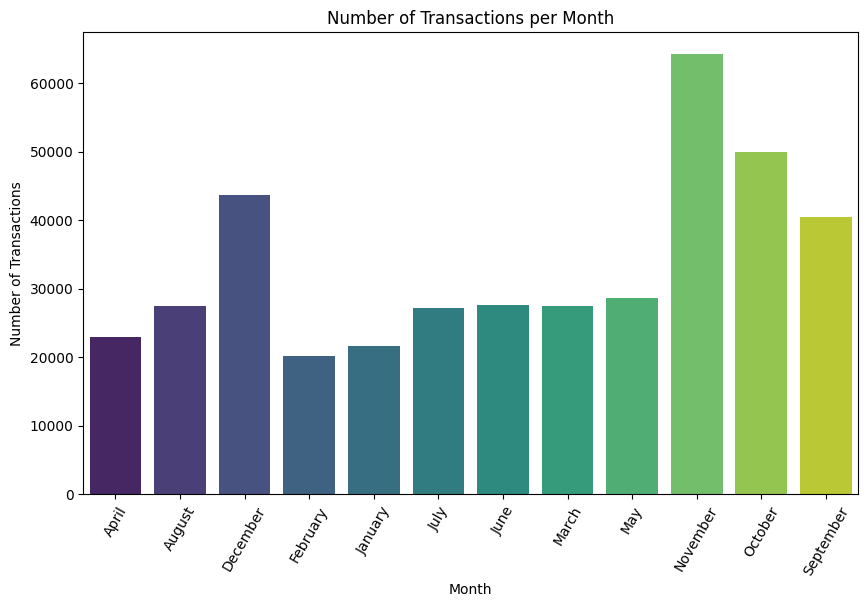

In [37]:
invoice_month_counts = data['InvoiceMonth'].value_counts().sort_index()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=invoice_month_counts.index, y=invoice_month_counts.values, palette="viridis")
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=60)
plt.show()


#### **Insights:**

---



- **Peak in November:**

The high transaction volume in November suggests a seasonal or event-driven peak, possibly linked to holiday shopping, such as Black Friday, early holiday sales, or pre-Christmas purchases.

- **Sustained Activity in October and December:**

October’s and December’s high transaction volumes may imply a consistent interest leading up to the holiday season in December. October could capture early planners, while December sales might be from last-minute shoppers.

- **Drop in September:**

The lower transaction count in September could indicate a post-summer slump in shopping activity. This may reflect typical retail trends where consumers spend less after summer vacations and before the holiday season.

- **Potential for Promotional Strategies:**

Understanding that November and December are high-performing months, the business could benefit from increased promotional activities, strategic discounts, and inventory preparation in these months.
September may benefit from targeted promotions to mitigate the drop, such as back-to-school campaigns, pre-holiday offers, or clearance sales to encourage spending.


#### **Recommendations:**

---



- **Focus Marketing Efforts on Peak Months:** Plan special events, discounts, and marketing campaigns in October, November, and December to capture increased demand.

- **Seasonal Inventory Planning:** Adjust inventory and stock levels based on anticipated demand, especially for popular items in high-transaction months.

- **Promotions in Low Months:** To increase engagement during low months like September, consider limited-time offers or flash sales to boost demand and mitigate the seasonal dip in transactions.

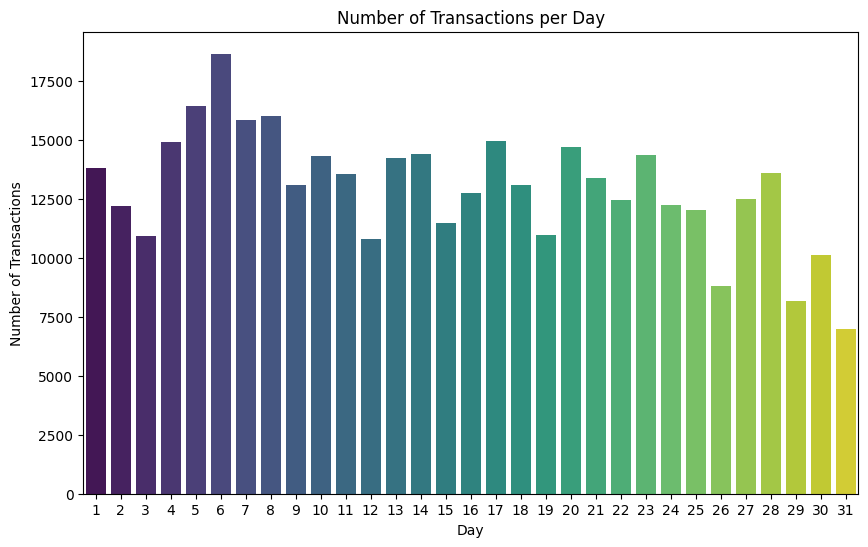

In [38]:
invoice_day_counts = data['InvoiceDay'].value_counts().sort_index()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=invoice_day_counts.index, y=invoice_day_counts.values, palette="viridis")
plt.title('Number of Transactions per Day')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

#### **Insights:**

---



- **Early Month Buying Behavior:**

The spike in transactions during the first 10 days could indicate that many customers prefer to shop at the beginning of the month. This behavior might be tied to payday cycles, where people receive their income around the start of the month and have more disposable income available for spending.

- **Gradual Decline:**

The decline in transactions as the month progresses suggests that customers may reduce discretionary spending as they manage their budgets. By the middle to the end of the month, they might be conserving funds, leading to fewer transactions.

- **Budget-Conscious Shoppers:**

This pattern could imply a customer base that is mindful of budgeting, likely indicating more price-sensitive or value-conscious customers who prioritize spending when funds are freshest.


#### **Recommendations:**

---



- **Launch Promotions Early in the Month:**

Since the start of the month has higher transaction volumes, launching promotions or new product announcements during this period could capitalize on higher spending motivation and lead to greater sales impact.

- **Mid-to-End-of-Month Incentives:**

To counteract the gradual decline, customers could be offered end-of-month promotions, loyalty rewards, or targeted discounts aimed at re-engaging customers as spending slows. This could help balance transaction volume across the month.

- **Align Inventory and Marketing Budgets:**

Understanding that early-month transactions are higher, you can better allocate inventory and manage marketing spend to match this demand pattern.

- **Payday Campaigns:**

If this trend aligns with customers’ payday cycles, consider “payday specials” around the beginning of the month to further leverage high spending periods and build customer loyalty.

#### Bivariate and Multivariate Analysis

#### 1. Analyze Frequency of Product Purchases

In [39]:
# Frequency of each product (based on purchase quantity)
product_frequency = data.groupby(['StockCode','Description'])['purchased_quantity'].sum().reset_index()
product_frequency = product_frequency.sort_values(by='purchased_quantity', ascending=False)

# Display the top 10 most purchased products
top_10_products = product_frequency.head(10)
print(top_10_products)

         StockCode                         Description  purchased_quantity
9364417      23843         PAPER CRAFT , LITTLE BIRDIE               80995
7797898      23166      MEDIUM CERAMIC TOP STORAGE JAR               77916
10959357     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS               54319
12605331    85099B             JUMBO BAG RED RETROSPOT               46078
12661820    85123A  WHITE HANGING HEART T-LIGHT HOLDER               36706
11957041     84879       ASSORTED COLOUR BIRD ORNAMENT               35263
1658079      21212     PACK OF 72 RETROSPOT CAKE CASES               33670
4257044      22197                      POPCORN HOLDER               30919
7494677      23084                  RABBIT NIGHT LIGHT               27153
5285033      22492             MINI PAINT SET VINTAGE                26076


#### 2. Identify Top Products by Total Purchases and Unit Price

In [40]:
# Total purchase transaction value for each product
product_sales_value = data.groupby(['StockCode','Description'])['purchase_transaction'].sum().reset_index()
product_sales_value = product_sales_value.sort_values(by='purchase_transaction', ascending=False)

# Display the top 10 products by total purchase value
top_10_products_by_sales = product_sales_value.head(10)
print(top_10_products_by_sales)

         StockCode                         Description  purchase_transaction
9364417      23843         PAPER CRAFT , LITTLE BIRDIE             168469.60
5036412      22423            REGENCY CAKESTAND 3 TIER             142264.75
12661820    85123A  WHITE HANGING HEART T-LIGHT HOLDER             100392.10
12605331    85099B             JUMBO BAG RED RETROSPOT              85040.54
7797898      23166      MEDIUM CERAMIC TOP STORAGE JAR              81416.73
14351592      POST                             POSTAGE              77803.96
10128059     47566                       PARTY BUNTING              68785.23
11957041     84879       ASSORTED COLOUR BIRD ORNAMENT              56413.03
14343316         M                              Manual              53419.93
7494677      23084                  RABBIT NIGHT LIGHT              51251.24


#### **Insights:**

---



- **Top Revenue-Generating Product:**

"PAPER CRAFT, LITTLE BIRDIE" is the highest revenue-generating product with a total purchase transaction value of 168,469.60. This product stands out significantly, indicating high customer demand or pricing contributing to its revenue dominance.

- **Diverse Product Categories:**

The top products span a variety of categories, including decorative items ("WHITE HANGING HEART T-LIGHT HOLDER", "RABBIT NIGHT LIGHT"), functional items ("JUMBO BAG RED RETROSPOT", "MEDIUM CERAMIC TOP STORAGE JAR"), and gifting-related products ("PARTY BUNTING", "REGENCY CAKESTAND 3 TIER").

- **Postage and Manuals in the Top 10:**

"POSTAGE" and "Manual" appearing in the top 10 suggest that a portion of the revenue is attributed to additional fees or non-physical items, likely indicating operational charges or digital/manual-based add-ons contributing to revenue.

- **High Revenue for Decorative Products:**

Items such as "WHITE HANGING HEART T-LIGHT HOLDER" and "ASSORTED COLOUR BIRD ORNAMENT" highlight strong demand for aesthetically appealing or home-decor items, reflecting customer preferences.

- **Popular Gift Items:**

Products like "PARTY BUNTING" and "REGENCY CAKESTAND 3 TIER" suggest these items might be popular for celebrations and gifting purposes, aligning with the retailer's specialization in unique all-occasion gifts.


#### **Recommendations:**

---



- **Focus on Top Sellers:**

Ensure consistent stock availability for high-performing items, especially those like "PAPER CRAFT, LITTLE BIRDIE" and "REGENCY CAKESTAND 3 TIER", to avoid revenue loss due to stockouts.

- **Expand Marketing Efforts:**

Promote the top-selling decorative and gift-related items through targeted campaigns to capitalize on customer interest in these categories.

- **Analyze Pricing and Demand Elasticity:**

For high-revenue items like "PAPER CRAFT, LITTLE BIRDIE", consider assessing price sensitivity and potential for incremental pricing adjustments without deterring demand.

- **Bundle and Cross-Sell:**

Create bundles involving popular products such as "WHITE HANGING HEART T-LIGHT HOLDER" and "ASSORTED COLOUR BIRD ORNAMENT" with complementary items to boost average order value.

- **Investigate Revenue from Non-Physical Items:**

Evaluate the proportion of revenue from items like "POSTAGE" and "Manual" to understand their role in overall profitability and whether optimization opportunities exist.

 #### Identifying Top-Selling and High-Return Items

In [41]:
# Grouping by StockCode and Description to identify top-selling and high-return items
# Aggregating the total purchased and returned quantities
top_selling_items = data.groupby(['StockCode', 'Description'])['purchased_quantity'].sum().reset_index()
top_selling_items = top_selling_items.sort_values(by='purchased_quantity', ascending=False)

# Aggregating the total returned quantities
high_return_items = data.groupby(['StockCode', 'Description'])['returned_quantity'].sum().reset_index()
high_return_items = high_return_items.sort_values(by='returned_quantity', ascending=False)

# Displaying the top-selling items (Top 10)
print("Top-Selling Items:")
print(top_selling_items.head(10))

# Displaying the high-return items (Top 10)
print("\nHigh-Return Items:")
print(high_return_items.head(10))

Top-Selling Items:
         StockCode                         Description  purchased_quantity
9364417      23843         PAPER CRAFT , LITTLE BIRDIE               80995
7797898      23166      MEDIUM CERAMIC TOP STORAGE JAR               77916
10959357     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS               54319
12605331    85099B             JUMBO BAG RED RETROSPOT               46078
12661820    85123A  WHITE HANGING HEART T-LIGHT HOLDER               36706
11957041     84879       ASSORTED COLOUR BIRD ORNAMENT               35263
1658079      21212     PACK OF 72 RETROSPOT CAKE CASES               33670
4257044      22197                      POPCORN HOLDER               30919
7494677      23084                  RABBIT NIGHT LIGHT               27153
5285033      22492             MINI PAINT SET VINTAGE                26076

High-Return Items:
         StockCode                          Description  returned_quantity
9364417      23843          PAPER CRAFT , LITTLE BIRDIE      

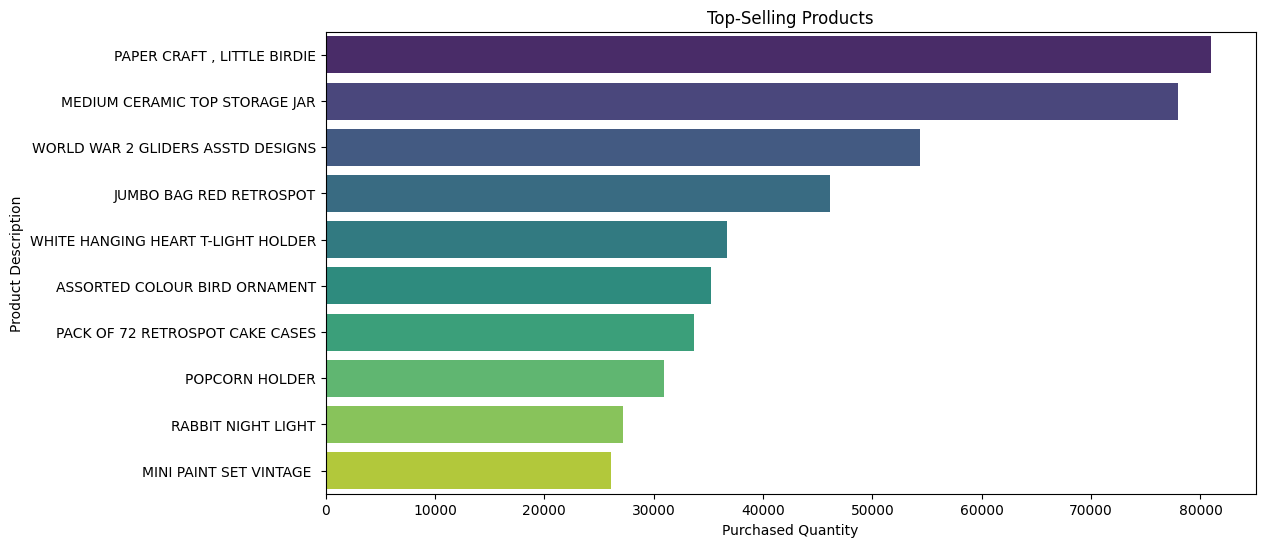

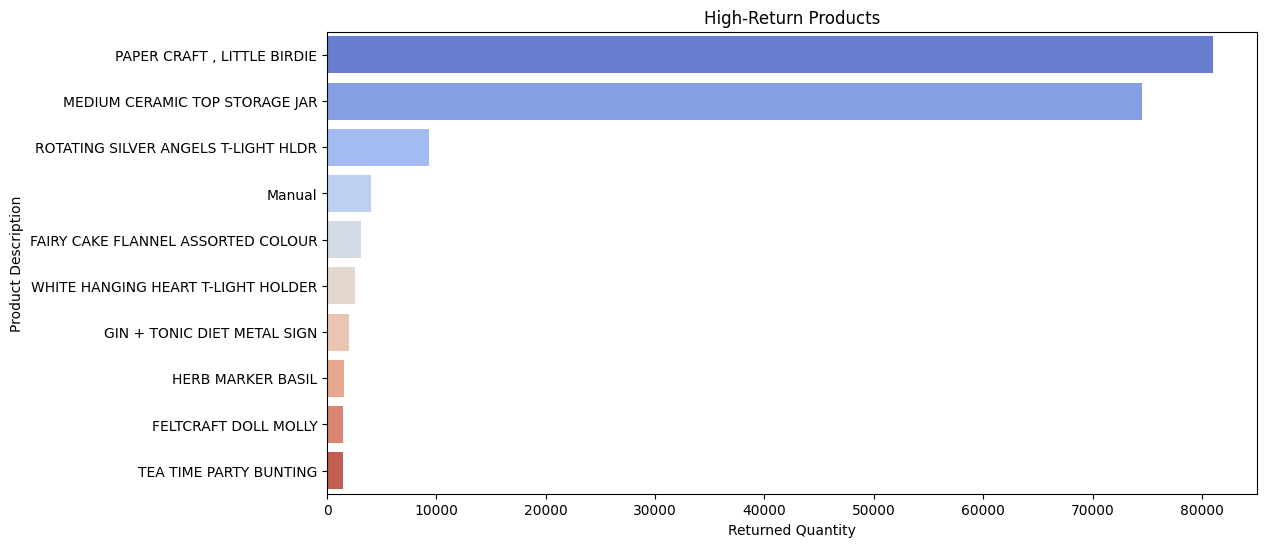

In [42]:
# Visualizing top-selling items
plt.figure(figsize=(12, 6))
sns.barplot(x='purchased_quantity', y='Description', data=top_selling_items.head(10), palette="viridis")
plt.title('Top-Selling Products')
plt.xlabel('Purchased Quantity')
plt.ylabel('Product Description')
plt.show()

# Visualizing high-return items
plt.figure(figsize=(12, 6))
sns.barplot(x='returned_quantity', y='Description', data=high_return_items.head(10), palette="coolwarm")
plt.title('High-Return Products')
plt.xlabel('Returned Quantity')
plt.ylabel('Product Description')
plt.show()

#### **Top-Selling Items Insights:**

---




- **High-Demand Products:**

"PAPER CRAFT, LITTLE BIRDIE" is the highest-selling item with a purchased quantity of 80,995, reflecting its popularity and consistent customer demand.
Items like "MEDIUM CERAMIC TOP STORAGE JAR" and "WORLD WAR 2 GLIDERS ASSTD DESIGNS" also have significant sales, indicating their wide appeal.

- **Decorative and Functional Items:**

Many of the top-selling items, such as "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT", belong to decorative or functional categories, aligning with the retailer's specialization in unique all-occasion gifts.

- **Small Affordable Items:**

Items like "PACK OF 72 RETROSPOT CAKE CASES" and "MINI PAINT SET VINTAGE" demonstrate the popularity of small, affordable products likely purchased in bulk or for gifting.



#### **High-Return Items Insights:**

---



- **Correlation Between High Sales and High Returns:**

The "PAPER CRAFT, LITTLE BIRDIE" and "MEDIUM CERAMIC TOP STORAGE JAR" are both the top-selling and top-returned items. This suggests that while they are popular, they may have quality, packaging, or customer expectation issues leading to a high return rate.

- **Notable Return Rates for Specific Items:**

Decorative items like "ROTATING SILVER ANGELS T-LIGHT HLDR" and "WHITE HANGING HEART T-LIGHT HOLDER" also have significant returns, possibly due to fragile nature or mismatched customer expectations.

- **Manual and Non-Decorative Items:**

Items like "Manual" and "GIN + TONIC DIET METAL SIGN" also have high returns, potentially due to usability or mismatch between product description and customer expectations.

- **Other Issues with Niche Items:**

Niche or novelty products like "HERB MARKER BASIL" and "FELTCRAFT DOLL MOLLY" show significant returns despite lower overall sales, suggesting possible quality or specificity issues.



#### **Recommendations:**

---



- **Investigate High Return Rates:**

For top-returned items such as "PAPER CRAFT, LITTLE BIRDIE" and "MEDIUM CERAMIC TOP STORAGE JAR", investigate reasons for returns by analyzing customer feedback, complaints, and reviews.

- **Enhance Quality Control:**

Improve quality control processes, especially for fragile decorative items, to reduce the return rate and increase customer satisfaction.

- **Revise Product Descriptions:**

Ensure product descriptions and images accurately represent the items to better align with customer expectations, particularly for items like "GIN + TONIC DIET METAL SIGN" and "ROTATING SILVER ANGELS T-LIGHT HLDR".

- **Develop Return Mitigation Strategies:**

Introduce additional packaging for fragile items and explore customer support options (e.g., size guides or detailed specs) to minimize dissatisfaction.

- **Focus on Popular Products:**

Increase the marketing and stock availability of high-demand items like "PAPER CRAFT, LITTLE BIRDIE" and "JUMBO BAG RED RETROSPOT", while addressing any return issues to maximize profitability.

- **Bundle Low-Return Items:**

Bundle products with low return rates alongside high-return items to encourage sales while spreading the risk of dissatisfaction.


#### Country-wise Analysis

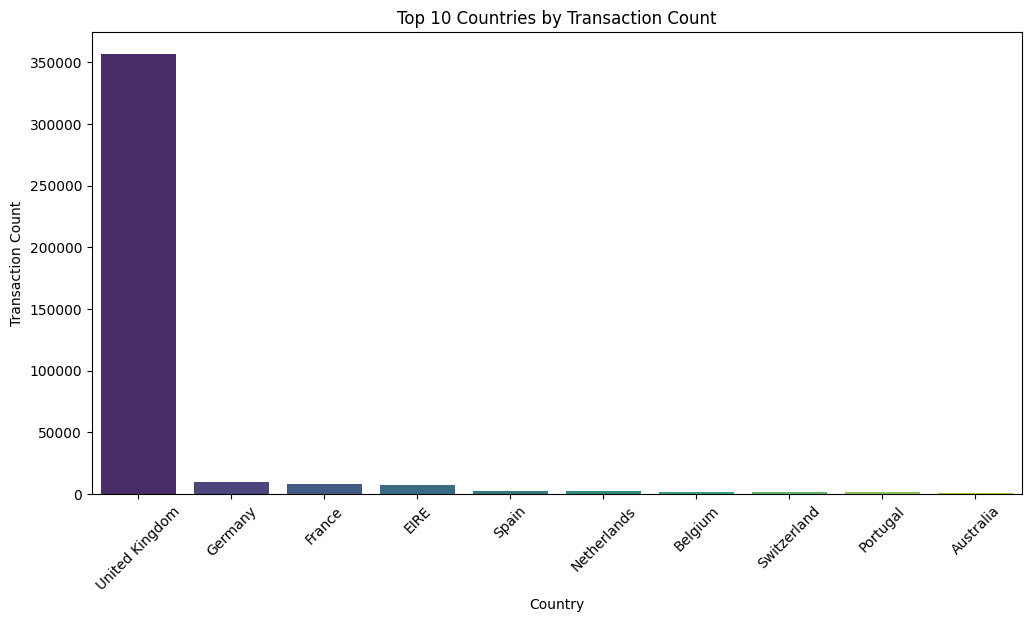

In [43]:
# Get the top 10 countries by count
top_countries = data['Country'].value_counts().nlargest(10).index

# Filter data to include only rows where the country is in the top 10
top_country_data = data[data['Country'].isin(top_countries)]

# Plot the countplot for the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(data=top_country_data, x='Country', order=top_countries, palette="viridis")
plt.title("Top 10 Countries by Transaction Count")
plt.xlabel("Country")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

#### **Insights:**

---



- **Dominance of the United Kingdom:**

The United Kingdom has an overwhelmingly high number of transactions compared to other countries, reflecting that the business is primarily UK-centric. This could be because the company is based in the UK and caters mainly to local customers.

- **Limited International Presence:**

The number of transactions in other countries, such as Germany, France and EIRE is significantly lower than in the UK. These countries rank next in transaction volume but indicate limited penetration compared to the domestic market.

- **Potential Growth in International Markets:**

While Germany and France lead the international transactions, their counts are far behind the UK, indicating potential opportunities to grow the customer base in these regions.

- **Long-Tail Effect:**

After the top four countries (UK, Germany, France, and EIRE), the transaction counts drop further for other countries in the top 10, suggesting a more modest presence or limited demand in those regions.


#### **Recommendations:**

---



- **Leverage UK Strength:**

Continue to focus on and expand the already strong presence in the UK market by introducing new product lines, enhancing customer loyalty programs, and optimizing marketing campaigns.

- **Boost Presence in Key International Markets:**

Analyze customer preferences and behaviors in Germany ,France and EIRE to tailor offerings and marketing strategies specifically for these regions.
Collaborate with local distributors or explore country-specific marketing initiatives to increase penetration.

- **Explore Untapped International Markets:**

Consider researching countries outside the top 10 that could have untapped potential. Factors such as similar cultural preferences or geographic proximity to the UK could guide prioritization.

- **Analyze Barriers to Growth in Other Countries:**

Identify factors contributing to the low transaction volume in international markets, such as shipping costs, delivery times, or lack of localized offerings, and address these to enhance global competitiveness.

- **Cross-Border Marketing and Promotions:**

Use Germany, France and EIRE as pilot markets for cross-border marketing campaigns and test strategies like discounts, free shipping, or region-specific collections to drive international growth.

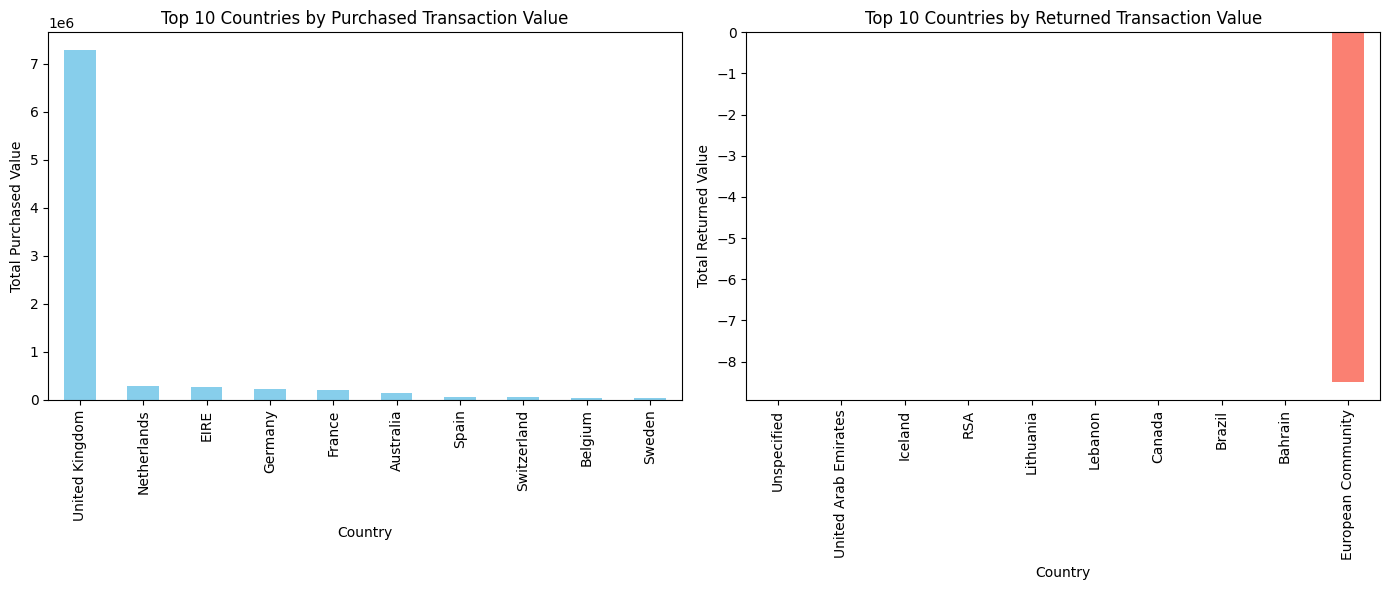

In [44]:
# Calculate purchase and return transactions by country
country_purchase_data = data.groupby('Country')['purchase_transaction'].sum().sort_values(ascending=False)
country_return_data = data.groupby('Country')['return_transaction'].sum().sort_values(ascending=False)

# Plot purchases and returns by country
plt.figure(figsize=(14, 6))

# Plot for purchased transactions
plt.subplot(1, 2, 1)
country_purchase_data.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Purchased Transaction Value")
plt.ylabel("Total Purchased Value")

# Plot for returned transactions
plt.subplot(1, 2, 2)
country_return_data.head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Countries by Returned Transaction Value")
plt.ylabel("Total Returned Value")

plt.tight_layout()
plt.show()

#### **Insights:**

---



- **Purchased Transactions:**


**Dominance of the United Kingdom:**

The UK has an extraordinarily high total purchase value, much greater than any other country. This aligns with previous observations that the business is primarily UK-centric, reflecting a strong domestic customer base and revenue generation.

- **Leading International Markets:**

The Netherlands, EIRE (Ireland), Germany, and France follow the UK in total purchase value, but their bars are significantly shorter. These countries are key international markets with potential for growth, though they currently contribute only a fraction of the UK’s purchase value.

- **Opportunities for Revenue Growth:**

The large gap between the UK and other countries suggests potential to increase revenue by tailoring marketing and product offerings to these international markets.



- **Returned Transactions:**

**High Returns from the European Community:**

The European Community (EC) has the highest total value of returned transactions, even surpassing the UK, which is notable given its smaller share of purchase transactions.
This could indicate specific issues in transactions with customers from the EC, such as dissatisfaction with products, shipping issues, or unmet expectations.

- **UK Returns Are Proportionately Low:**

Despite its dominance in purchase value, the UK does not lead in returned transactions, suggesting relatively high customer satisfaction or efficient handling of returns domestically.

- **Return Trends in Other Countries:**

Countries like Germany, France, and the Netherlands also show returned transaction values, but these are much lower than those from the EC. This may indicate different market expectations or operational efficiency in these regions.






#### **Recommendations:**

---



- **For Purchases:**

**Focus on High-Potential Markets:**

Expand efforts in countries like the Netherlands, EIRE, Germany, and France by analyzing customer preferences and addressing barriers such as shipping costs, delivery times, or product availability.

**Enhance International Marketing Campaigns:**

Run localized advertising campaigns in key international markets to increase awareness and drive sales.

**Leverage UK Success:**

Use insights from the UK’s success to replicate best practices in other regions.


- **For Returns:**

**Investigate High Returns from the European Community:**

Analyze return reasons for EC customers, such as product quality, shipping issues, or unmet expectations, and address these pain points.

**Implement Quality Control Measures:**

Ensure that products shipped to international markets, especially the EC, meet high-quality standards to minimize dissatisfaction and returns.

**Improve Return Policies:**

Review and potentially optimize return policies for international customers to strike a balance between customer satisfaction and minimizing returns.

**Proactively Engage Customers:**

Reach out to customers in the EC with higher return rates to understand and address their concerns, potentially converting them into satisfied repeat customers.



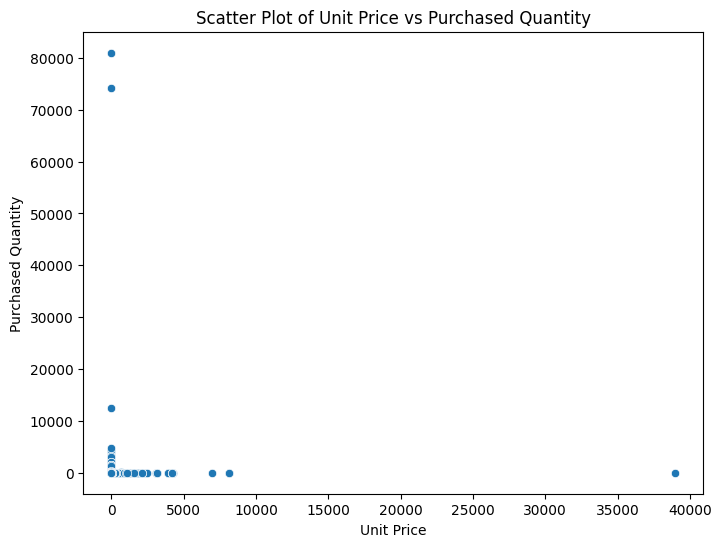

In [45]:
# Scatter plot between UnitPrice and purchased_quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=numerical_data, x='UnitPrice', y='purchased_quantity')
plt.title("Scatter Plot of Unit Price vs Purchased Quantity")
plt.xlabel("Unit Price")
plt.ylabel("Purchased Quantity")
plt.show()

#### **Insights**

---



- **High Quantity for Low Unit Prices:**

The majority of transactions with high purchased quantities are concentrated at the lower end of the unit price range. This indicates that customers are more likely to purchase large quantities of low-priced items, which is consistent with typical buying behavior for affordable products or bulk purchases.

- **Sparse Data for High Unit Prices:**

Transactions involving higher unit prices are relatively rare, and when they occur, the purchased quantities tend to be significantly lower. This suggests that high-priced items are either luxury or niche products, and customers are less inclined to buy them in bulk.

- **Outliers:**

There might be a few outliers where extremely high quantities are purchased even at a low unit price. These could represent bulk orders, business-to-business transactions, or errors in data entry.

- **Absence of a Clear Trend:**

There does not appear to be a strong linear or non-linear correlation between unit price and purchased quantity. This suggests that purchasing behavior is influenced by other factors, such as product type, customer demographics, or marketing efforts.


#### **Recommendations**

---



- **Marketing Low-Priced Items in Bulk:**

Focus marketing campaigns on promoting bulk purchases of low-priced items, as this aligns with observed customer behavior.

- **Targeting High-Value Customers:**

Develop strategies to promote high-priced items to specific customer segments, possibly through personalized recommendations or exclusive offers.

- **Investigate Outliers:**

Analyze transactions with extremely high purchased quantities for anomalies or potential errors. If legitimate, identify the customers or businesses involved and explore opportunities to build stronger relationships with them.

- **Category-Based Analysis:**

Conduct further analysis to understand how different product categories contribute to this distribution. Some high-priced items may inherently have low demand, which could skew the overall pattern.

- **Bundling Strategies:**

Introduce bundling or discount strategies for high-priced items to encourage higher purchased quantities.


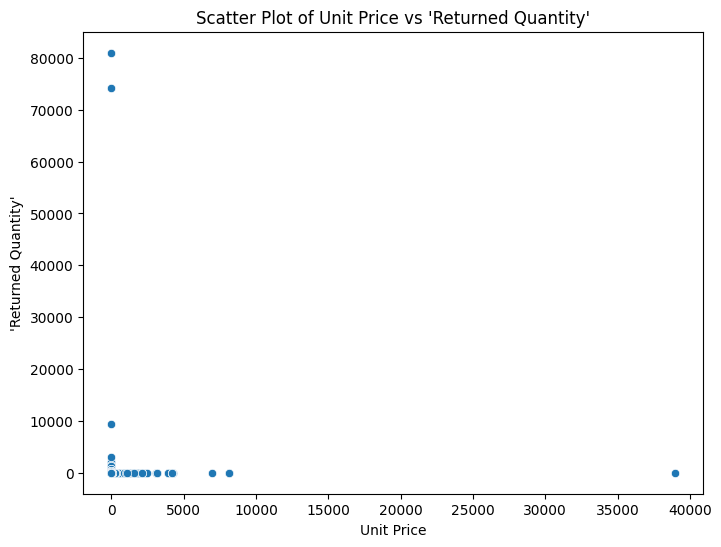

In [46]:
# Scatter plot between UnitPrice and returned_quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=numerical_data, x='UnitPrice', y='returned_quantity')
plt.title("Scatter Plot of Unit Price vs 'Returned Quantity'")
plt.xlabel("Unit Price")
plt.ylabel("'Returned Quantity'")
plt.show()

#### **Insights**

---



- **Low Unit Prices and Higher Returns:**

A significant number of returns are concentrated at the lower end of the unit price range. This suggests that low-priced items may be returned more frequently. Possible reasons include:
The items not meeting customer expectations.
Higher volumes of low-priced items sold, which naturally increases the chance of returns.

- **Sparse Returns for High Unit Prices:**

Returns for high unit-priced items are minimal and scattered. This could indicate:
Customers are more careful when purchasing expensive items.
Higher-quality standards or lower sales volumes of high-priced items.

- **Outliers:**

There might be a few extreme outliers where a very high quantity of a product was returned. These could represent:
Issues with product quality.
Errors in shipping or order fulfillment.
Bulk orders being returned.

- **No Strong Trend:**

Similar to the purchased quantity scatter plot, there is no clear linear or non-linear correlation between unit price and returned quantity. This suggests that return behavior is likely influenced by other factors such as product type, customer satisfaction, or shipping issues.



#### **Recommendations**

---



- **Analyze Low-Priced Items:**

Investigate why low-priced items have higher return rates. Consider reviewing product descriptions, customer feedback, and quality control measures for these items.

- **Reduce Returns for Bulk Orders:**

For outlier cases of high return quantities, analyze whether these are due to bulk order cancellations or defects, and work on strategies to mitigate such returns.

- **Enhance Quality for High-Return Items:**

Identify specific low-priced products with consistently high returns. Improving their quality or setting clearer expectations through detailed product descriptions can help reduce returns.

- **Segment Returns by Product Category:**

Explore whether certain categories of items (e.g., fragile, seasonal, or trend-based) have higher return rates and address underlying issues.

- **Customer Communication:**

For high-return scenarios, consider strengthening customer support and providing clear return policies to build trust while aiming to reduce unnecessary returns.


#### Correlation Analysis

In [47]:
numerical_data= data.select_dtypes(include=['number'])

In [48]:
numerical_data.corr()

,UnitPrice,purchase_transaction,return_transaction,purchased_quantity,returned_quantity
UnitPrice,1.000000,0.025370,-0.210941,-0.001801,-0.000070
purchase_transaction,0.025370,1.000000,0.000362,0.908884,-0.000281
return_transaction,-0.210941,0.000362,1.000000,0.000361,-0.923724
purchased_quantity,-0.001801,0.908884,0.000361,1.000000,-0.000279
returned_quantity,-0.000070,-0.000281,-0.923724,-0.000279,1.000000


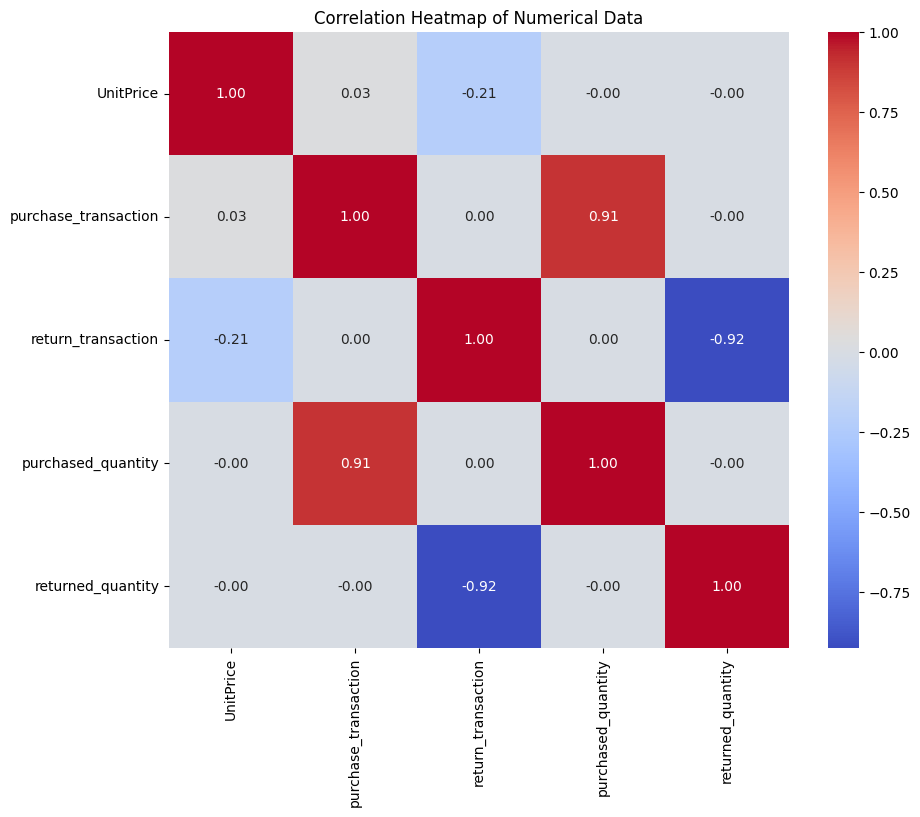

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Data")
plt.show()

#### **Insights**

---



- 1. **Low Correlation Between UnitPrice and Other Variables:**

UnitPrice shows a very weak correlation with all other variables:
purchase_transaction (0.03): Indicates that the unit price has almost no influence on the total purchase transaction value.
returned_quantity (-0.00): Suggests that the price of a product does not significantly impact the likelihood of returns.

- 2. **Strong Positive Correlation Between purchase_transaction and purchased_quantity:**

Correlation coefficient = 0.91, indicating a very strong positive relationship.
This is expected, as higher quantities purchased naturally lead to higher transaction values.

- 3. **Strong Negative Correlation Between returned_quantity and return_transaction:**

Correlation coefficient = -0.92, suggesting that as the monetary value of returns increases, the quantity returned decreases and vice versa. This could point to:
A few expensive items being returned in smaller quantities.
Bulk items (low-priced) contributing to larger return quantities but lower transaction values.

- 4. **No Significant Correlation Between purchased_quantity and returned_quantity:**

Correlation coefficient = -0.00, indicating no direct relationship. This means:
The quantity purchased doesn't strongly predict the quantity returned.
Returns may depend on other factors such as product type or customer satisfaction.

- 5. **Weak Correlation Between UnitPrice and return_transaction:**

Correlation coefficient = -0.21, suggesting that as unit price increases, the return transaction value tends to decrease slightly. Higher-priced items may be returned less frequently in terms of monetary value.


#### **Recommendations**

---



- 1. **Analyze Return Patterns:**

Investigate the causes of the strong negative correlation between returned_quantity and return_transaction. For high-priced items, focus on return policies, and for low-priced bulk returns, review product quality or bulk sales terms.

- 2. **Monitor Purchased Quantities:**

Since purchased_quantity has a strong positive impact on purchase_transaction, promotional efforts that encourage bulk purchases could directly increase sales value.

- 3. **Focus on Pricing Strategy:**

The weak correlation between UnitPrice and other variables suggests price has minimal direct impact on transaction volumes or return behavior. Consider experimenting with price adjustments to test indirect effects.

- 4. **Explore Qualitative Factors:**

Since most correlations are weak, it’s likely that non-numerical factors (e.g., product type, customer satisfaction, or seasonal trends) play a larger role. Segment the data further for a more nuanced analysis.


### Feature Engineering

### 1. Core RFM Metrics and Segmentation

- **Recency:** Days since the customer’s last purchase, indicating their engagement freshness. This can help in reactivating dormant customers.

- **Frequency:** The number of unique purchase occasions within the analysis period, representing loyalty and likelihood to repurchase.

- **Monetary:** Total spend by each customer (excluding returns), highlighting customer value.

- **RFM Score Calculation:** Once RFM values are established, apply scoring rules to segment customers into activity-based categories (e.g., High Value, Potential, Dormant). This segmentation allows for tailored marketing strategies.

### 1.1 Define Recency, Frequency, and Monetary (RFM) Metrics

In [50]:
from datetime import datetime

# Set the analysis reference date (latest date in the dataset)
analysis_date = data['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary for each customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'purchase_transaction': 'sum',  # Total Purchase Amount
    'return_transaction': 'sum'  # Total Return Amount
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'purchase_transaction': 'Monetary_Purchase',
    'return_transaction': 'Monetary_Return'
}).reset_index()

# Deduplicate InvoiceDate data by keeping the most recent date for each CustomerID
recent_invoices = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Merge the deduplicated InvoiceDate into the RFM summary
rfm = rfm.merge(recent_invoices, on='CustomerID', how='left')

# Convert InvoiceDate to datetime (if necessary)
rfm['InvoiceDate'] = pd.to_datetime(rfm['InvoiceDate'])

# Calculate Net Monetary Value (Purchase minus Returns)
rfm['Monetary'] = rfm['Monetary_Purchase'] - rfm['Monetary_Return']

# Replace negative Monetary values with 0 (if any)
rfm['Monetary'] = rfm['Monetary'].apply(lambda x: x if x > 0 else 0)

# Drop individual Monetary_Purchase and Monetary_Return columns if not needed
rfm = rfm.drop(['Monetary_Purchase', 'Monetary_Return'], axis=1)

# Verify that there are no duplicate rows
rfm = rfm.drop_duplicates()

# Display the first few rows to verify
print(rfm.head())


  CustomerID  Recency  Frequency         InvoiceDate   Monetary
0    12346.0      325          2 2011-01-18 10:17:00  154367.20
1    12347.0        1          7 2011-12-07 15:52:00    4310.00
2    12348.0       74          4 2011-09-25 13:13:00    1797.24
3    12349.0       18          1 2011-11-21 09:51:00    1757.55
4    12350.0      309          1 2011-02-02 16:01:00     334.40


### 1.2  RFM Scoring and Segmentation

In [51]:
# Assign RFM quintiles using quantiles (qcut) and handle duplicates in bins
# High values for R_Quintile mean recent purchases, and high values for F_Quintile and M_Quintile represent higher frequency and spending

# Recency: Recent purchases are given higher scores
rfm['R_Quintile'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Frequency: Frequent purchasers are given higher scores
rfm['F_Quintile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Monetary: Higher spenders are given higher scores
rfm['M_Quintile'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Combine R, F, and M scores to form a composite RFM Score
rfm['RFM_Score'] = rfm['R_Quintile'].astype(str) + rfm['F_Quintile'].astype(str) + rfm['M_Quintile'].astype(str)

# Display the first few rows to confirm
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Quintile', 'F_Quintile', 'M_Quintile', 'RFM_Score']].head())



  CustomerID  Recency  Frequency   Monetary R_Quintile F_Quintile M_Quintile  \
0    12346.0      325          2  154367.20          1          2          5   
1    12347.0        1          7    4310.00          5          4          5   
2    12348.0       74          4    1797.24          2          3          4   
3    12349.0       18          1    1757.55          4          1          4   
4    12350.0      309          1     334.40          1          1          2   

  RFM_Score  
0       125  
1       545  
2       234  
3       414  
4       112  


### 1.3 RFM-Based Segmentation

Define segments based on RFM scores:

- **Champions:** High Recency, High Frequency, High Monetary (scores like 555)

- **Potential Loyalists:** Moderate Recency and Frequency with high Monetary

- **At-Risk:** Low Frequency and Monetary, higher Recency

- **Dormant:** Low values for all three

In [52]:
# Define segmentation rules
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Champion'
    elif row['R_Quintile'] in ['4', '5'] and row['F_Quintile'] in ['4', '5']:
        return 'Loyal Customer'
    elif row['R_Quintile'] in ['1', '2'] and row['F_Quintile'] in ['1', '2']:
        return 'At-Risk'
    elif row['RFM_Score'].startswith('1'):
        return 'Dormant'
    else:
        return 'Potential'

# Apply segmentation to each customer
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Display segmentation results
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']].head())


  CustomerID  Recency  Frequency   Monetary RFM_Score    Segment
0    12346.0      325          2  154367.20       125    Dormant
1    12347.0        1          7    4310.00       545  Potential
2    12348.0       74          4    1797.24       234  Potential
3    12349.0       18          1    1757.55       414  Potential
4    12350.0      309          1     334.40       112    Dormant


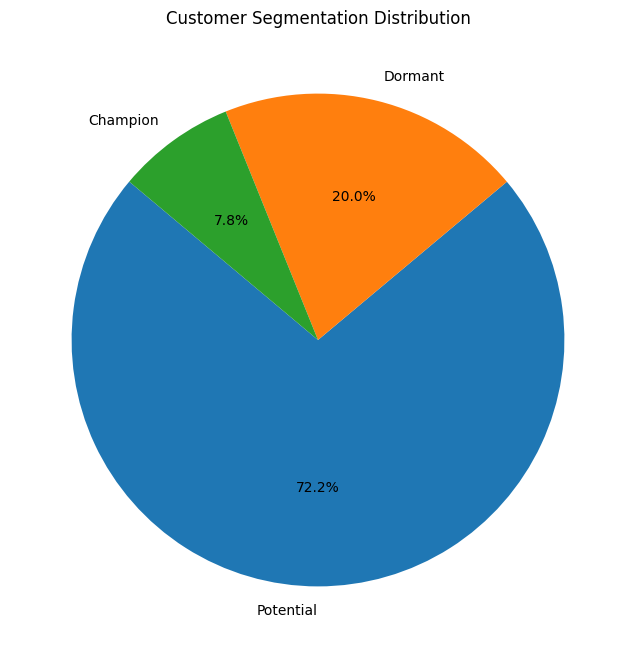

In [53]:
# Count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Define labels and sizes for the pie chart
labels = segment_counts.index
sizes = segment_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Add a title
plt.title('Customer Segmentation Distribution')

# Display the pie chart
plt.show()

### 1.4 4. Actionable Insights from Segmentation


#### 1. Customer Segmentation Overview:

---



The segmentation process has divided customers into distinct groups based on their RFM scores, which allows for targeted marketing strategies.

- **Champions:** Customers who are highly engaged (high recency), frequent buyers (high frequency), and high spenders (high monetary). These are your best customers who should be prioritized for loyalty programs and special offers to maintain their loyalty.

- **Loyal Customers:** These customers have a good frequency and monetary score but might not purchase as frequently in recent times. They are valuable and could be nurtured through retention efforts to keep them from slipping into lower engagement groups.

- **Potential Loyalists:** Customers who show moderate recency and frequency but have high monetary value. These customers might not have bought recently but have the potential to become high-value long-term customers with the right incentives or re-engagement strategies.

- **At-Risk:** Customers who have not made recent purchases (low recency), purchase infrequently (low frequency), and spend little (low monetary). These customers are at risk of churning and require targeted reactivation efforts to bring them back.

- **Dormant:** Customers who have not purchased in a long time, have low frequency, and low monetary value. These customers need urgent attention, with strategies to reactivate them, possibly through special offers or targeted campaigns.

#### 2. Insights from RFM Scores:

---



- **High-Value Customers:**

Customers with a RFM score of 555 (Champions) are likely to be highly engaged, and their loyalty should be nurtured with premium offers and personalized communication.

- **Dormant Customers:**

Customers with RFM scores starting with '1', particularly those in the Dormant segment, represent those who have not engaged with the brand recently. They might be worth targeting with re-engagement campaigns, discounts, or reminders of the value they can gain from returning.

- **Potential for Growth:**

Customers classified as Potential have some level of engagement (moderate recency and frequency) and higher spend but need nurturing to become loyal. Offering loyalty rewards or incentives for repeated purchases could help convert them into regular buyers.

- **Customer Retention Strategy:**

Loyal Customers and Potential Loyalists should be targeted with retention efforts like loyalty programs, regular communications, and personalized offers to prevent them from moving into the At-Risk or Dormant segments.

- **Reactivation Strategy:**

At-Risk and Dormant customers need reactivation strategies, which could include sending special offers, discounts, or reminders about what they’re missing by not purchasing.

- **Frequency and Recency Correlation:**

Customers with a high frequency but low recency (e.g., past loyal customers) should be reminded or incentivized to re-engage before they transition to lower segments.


#### Recommendations:

---



- Target Champions with loyalty offers to retain them and possibly reward them for referrals or upselling.

- Re-engage Dormant and At-Risk customers using targeted promotions or special offers to encourage their return.

- Focus on Potential Loyalists by offering incentives for frequent purchases and providing personalized experiences to make them more likely to purchase again.

- Track the movement of customers across segments over time to refine strategies and improve customer lifetime value.

### 2. Enhanced Customer-Centric Features

- **Average Days Between Purchases:** Calculates the mean time between purchases for each customer, providing insights into purchasing frequency and potential lifecycle patterns. This metric is useful for forecasting and anticipating future purchases.

- **Preferred Shopping Days:** Identifies the day of the week each customer prefers to shop (e.g., Mondays or weekends), aiding targeted campaigns based on peak activity days.

- **Peak Shopping Hours:** Analyzes the most common purchase times (e.g., morning or evening), supporting optimally timed promotions or customer service availability.

### 2.1  Average Days Between Purchases

In [54]:
# Sort data by CustomerID and InvoiceDate to calculate the days between purchases
data = data.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calculate the difference in days between consecutive purchases for each customer
data['Days_Between_Purchases'] = data.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculate the average days between purchases for each customer
avg_days_between_purchases = data.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index()
avg_days_between_purchases.rename(columns={'Days_Between_Purchases': 'Avg_Days_Between_Purchases'}, inplace=True)

# Now, merge this average days data back with the rfm DataFrame
rfm = rfm.merge(avg_days_between_purchases, on='CustomerID', how='left')

# Display the updated rfm DataFrame
print(rfm.head())



  CustomerID  Recency  Frequency         InvoiceDate   Monetary R_Quintile  \
0    12346.0      325          2 2011-01-18 10:17:00  154367.20          1   
1    12347.0        1          7 2011-12-07 15:52:00    4310.00          5   
2    12348.0       74          4 2011-09-25 13:13:00    1797.24          2   
3    12349.0       18          1 2011-11-21 09:51:00    1757.55          4   
4    12350.0      309          1 2011-02-02 16:01:00     334.40          1   

  F_Quintile M_Quintile RFM_Score    Segment  Avg_Days_Between_Purchases  
0          2          5       125    Dormant                         0.0  
1          4          5       545  Potential                         2.0  
2          3          4       234  Potential                         9.4  
3          1          4       414  Potential                         0.0  
4          1          2       112    Dormant                         0.0  


#### Insight:

---



This feature tells you how often customers make a purchase. For instance, customers with an average of 0.0 days between purchases are likely to be highly engaged and make frequent purchases (possibly daily). Others with higher averages (e.g., 9.4 days) might purchase less frequently, helping you identify customers with varying purchase frequencies.

#### Actionable Strategy:

---



Frequent buyers (those with low average days) might benefit from loyalty programs or early access to new products.
Infrequent buyers (higher averages) could be targeted with re-engagement campaigns or personalized promotions to increase purchase frequency.

### 2.2. Preferred Shopping Days

In [55]:
# Extract the day of the week for each purchase in the original data
data['Day_of_Week'] = data['InvoiceDate'].dt.day_name()

# Calculate the preferred shopping day for each customer
preferred_shopping_days = data.groupby('CustomerID')['Day_of_Week'].agg(lambda x: x.mode()[0]).reset_index()
preferred_shopping_days.rename(columns={'Day_of_Week': 'Preferred_Shopping_Day'}, inplace=True)


# Drop Preferred_Shopping_Day columns before merging
rfm = rfm.drop(columns=['Preferred_Shopping_Day_x', 'Preferred_Shopping_Day_y'], errors='ignore')

# Merge without creating duplicate columns
rfm = rfm.merge(preferred_shopping_days[['CustomerID', 'Preferred_Shopping_Day']], on='CustomerID', how='left')

# Perform the merge and rename right away
preferred_shopping_days = preferred_shopping_days.rename(columns={'Preferred_Shopping_Day_x': 'Preferred_Shopping_Day'})

# Display the updated DataFrame to verify
print(rfm.head())




  CustomerID  Recency  Frequency         InvoiceDate   Monetary R_Quintile  \
0    12346.0      325          2 2011-01-18 10:17:00  154367.20          1   
1    12347.0        1          7 2011-12-07 15:52:00    4310.00          5   
2    12348.0       74          4 2011-09-25 13:13:00    1797.24          2   
3    12349.0       18          1 2011-11-21 09:51:00    1757.55          4   
4    12350.0      309          1 2011-02-02 16:01:00     334.40          1   

  F_Quintile M_Quintile RFM_Score    Segment  Avg_Days_Between_Purchases  \
0          2          5       125    Dormant                         0.0   
1          4          5       545  Potential                         2.0   
2          3          4       234  Potential                         9.4   
3          1          4       414  Potential                         0.0   
4          1          2       112    Dormant                         0.0   

  Preferred_Shopping_Day  
0                Tuesday  
1                Tue

#### **Insight:**

---



This feature identifies the specific day of the week each customer prefers to shop (e.g., "Tuesday," "Thursday," "Monday"). By understanding this, you can tailor promotional emails, offers, or reminders to align with customers' preferred shopping days.

#### **Actionable Strategy:**

---



Schedule targeted campaigns, special offers, or reminders for the preferred shopping days (e.g., send a reminder email for a Tuesday shopper to encourage them to make a purchase).
Seasonal offers or limited-time promotions can be scheduled to match these days for maximum impact.

### 2.3 Peak Shopping Hours

In [56]:
latest_invoice_dates = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()

#  Merge the latest InvoiceDate into the rfm DataFrame
rfm = rfm.merge(latest_invoice_dates, on='CustomerID', how='left')

In [57]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'InvoiceDate_x', 'Monetary',
       'R_Quintile', 'F_Quintile', 'M_Quintile', 'RFM_Score', 'Segment',
       'Avg_Days_Between_Purchases', 'Preferred_Shopping_Day',
       'InvoiceDate_y'],
      dtype='object')

In [58]:
# Rename 'InvoiceDate_x' and 'InvoiceDate_y' to 'InvoiceDate'
rfm.rename(columns={'InvoiceDate_x': 'InvoiceDate', 'InvoiceDate_y': 'InvoiceDate'}, inplace=True)

# If you have two 'InvoiceDate' columns now, you can drop one if you don't need both
# Drop the first 'InvoiceDate' column (if required)
rfm = rfm.loc[:, ~rfm.columns.duplicated()]

# Display the updated DataFrame
print(rfm.head())

  CustomerID  Recency  Frequency         InvoiceDate   Monetary R_Quintile  \
0    12346.0      325          2 2011-01-18 10:17:00  154367.20          1   
1    12347.0        1          7 2011-12-07 15:52:00    4310.00          5   
2    12348.0       74          4 2011-09-25 13:13:00    1797.24          2   
3    12349.0       18          1 2011-11-21 09:51:00    1757.55          4   
4    12350.0      309          1 2011-02-02 16:01:00     334.40          1   

  F_Quintile M_Quintile RFM_Score    Segment  Avg_Days_Between_Purchases  \
0          2          5       125    Dormant                         0.0   
1          4          5       545  Potential                         2.0   
2          3          4       234  Potential                         9.4   
3          1          4       414  Potential                         0.0   
4          1          2       112    Dormant                         0.0   

  Preferred_Shopping_Day  
0                Tuesday  
1                Tue

In [59]:
rfm.head()

,CustomerID,Recency,Frequency,InvoiceDate,Monetary,R_Quintile,F_Quintile,M_Quintile,RFM_Score,Segment,Avg_Days_Between_Purchases,Preferred_Shopping_Day
0,12346.0,325,2,2011-01-18 10:17:00,154367.20,1,2,5,125,Dormant,0.0,Tuesday
1,12347.0,1,7,2011-12-07 15:52:00,4310.00,5,4,5,545,Potential,2.0,Tuesday
2,12348.0,74,4,2011-09-25 13:13:00,1797.24,2,3,4,234,Potential,9.4,Thursday
3,12349.0,18,1,2011-11-21 09:51:00,1757.55,4,1,4,414,Potential,0.0,Monday
4,12350.0,309,1,2011-02-02 16:01:00,334.40,1,1,2,112,Dormant,0.0,Wednesday


In [60]:
print(rfm.columns)

Index(['CustomerID', 'Recency', 'Frequency', 'InvoiceDate', 'Monetary',
       'R_Quintile', 'F_Quintile', 'M_Quintile', 'RFM_Score', 'Segment',
       'Avg_Days_Between_Purchases', 'Preferred_Shopping_Day'],
      dtype='object')


In [61]:
# Now that InvoiceDate exists, proceed with extracting the hour
rfm['Hour'] = rfm['InvoiceDate'].dt.hour

# Define morning/evening categories based on business hours
rfm['Shopping_Period'] = pd.cut(rfm['Hour'], bins=[0, 12, 24], labels=['Morning', 'Evening'], right=False)

# Determine the most common shopping period for each customer
peak_shopping_hours = rfm.groupby('CustomerID')['Shopping_Period'].agg(lambda x: x.mode()[0]).reset_index()
peak_shopping_hours.rename(columns={'Shopping_Period': 'Preferred_Shopping_Hour'}, inplace=True)

# Merge back to the main DataFrame if needed
rfm = rfm.merge(peak_shopping_hours, on='CustomerID', how='left')

# Check the result
rfm.head()

,CustomerID,Recency,Frequency,InvoiceDate,Monetary,R_Quintile,F_Quintile,M_Quintile,RFM_Score,Segment,Avg_Days_Between_Purchases,Preferred_Shopping_Day,Hour,Shopping_Period,Preferred_Shopping_Hour
0,12346.0,325,2,2011-01-18 10:17:00,154367.20,1,2,5,125,Dormant,0.0,Tuesday,10,Morning,Morning
1,12347.0,1,7,2011-12-07 15:52:00,4310.00,5,4,5,545,Potential,2.0,Tuesday,15,Evening,Evening
2,12348.0,74,4,2011-09-25 13:13:00,1797.24,2,3,4,234,Potential,9.4,Thursday,13,Evening,Evening
3,12349.0,18,1,2011-11-21 09:51:00,1757.55,4,1,4,414,Potential,0.0,Monday,9,Morning,Morning
4,12350.0,309,1,2011-02-02 16:01:00,334.40,1,1,2,112,Dormant,0.0,Wednesday,16,Evening,Evening


#### **Insight:**

---



Customers who primarily shop during morning hours (e.g., 10 AM) may prefer a different type of communication or service compared to those who shop in the evening (e.g., 6 PM). This metric helps identify peak shopping times for each customer.

#### **Actionable Strategy:**

---



- **Timing of promotions and campaigns:** Send targeted ads, notifications, or promotions during the customer’s peak shopping hours (e.g., sending an exclusive offer for evening shoppers).

- **Customer service optimization:** Ensure customer service is available during peak shopping periods to address any questions or concerns promptly.

- Adjust marketing messaging to align with shopping times; for instance, morning shoppers might respond better to early-bird deals.

### 3. Cohort Analysis

####  3.1: Create Cohorts Based on the First Purchase Month

In [62]:

# Convert the InvoiceDate to datetime if it's not already
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Get the first purchase date for each customer
first_purchase = data.groupby('CustomerID')['InvoiceDate'].min().reset_index()

# Extract the month and year of the first purchase (Cohort Month)
first_purchase['CohortMonth'] = first_purchase['InvoiceDate'].dt.to_period('M')

# Merge the first purchase data with the main dataset to assign each customer a cohort label
# Assign the result back to the 'data' variable
# Instead of merging on ['CustomerID', 'CohortMonth'], which would cause duplicate columns,
# we merge only on 'CustomerID' and select only the 'CohortMonth' column from first_purchase.
# This avoids the conflict and assigns the cohort label to each customer.
# The following line caused the error, it's now commented out
# data = data.merge(first_purchase[['CustomerID', 'CohortMonth']], on='CustomerID', how='left') #, suffixes=('_x', '_y'))
# Replace it with the following to avoid the error
data = data.merge(first_purchase[['CustomerID', 'CohortMonth']], on='CustomerID', how='left', suffixes=('', '_y'))
# Remove the original 'CohortMonth' column which was causing the conflict
#data = data[[h for h in list(data) if 'y' not in h]]
data = data.drop(columns=['CohortMonth_y'])
#data = data.drop(columns=['CohortMonth_x']) # No need to drop, as we renamed during the merge
# Rename the merged 'CohortMonth_y' to 'CohortMonth' for clarity
#data = data.rename(columns={'CohortMonth_y': 'CohortMonth'}) # No need to rename, as it was automatically handled by suffixes
# Rename the existing column to CohortMonth (to prevent renaming conflicts in case you use CohortMonth later)
#data = data.rename(columns={'CohortMonth': 'CohortMonth_original'}) # Not needed anymore




KeyError: "['CohortMonth_y'] not found in axis"

####  3.2: Calculate the Number of Periods Since the First Purchase

In [ ]:
# Create a new column for the period of the current purchase
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

# Calculate the difference in months between the current purchase and the first purchase (Cohort Period)
data['CohortPeriod'] = (data['InvoiceMonth'].dt.year - data['CohortMonth'].dt.year) * 12 + (data['InvoiceMonth'].dt.month - data['CohortMonth'].dt.month)


####  3.3: Calculate Cohort Metrics (e.g., Number of Purchases, Retention, etc.)

In [ ]:
# Group by CohortMonth and CohortPeriod and count the number of unique customers
cohort_data = data.groupby(['CohortMonth', 'CohortPeriod'])['CustomerID'].nunique().reset_index()

# Pivot the table to have CohortPeriod as columns
cohort_data_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID')

# Calculate retention rate: number of customers in each period / number of customers in the first period (Cohort Month)
cohort_data_pivot = cohort_data_pivot.divide(cohort_data_pivot[0], axis=0)

# Optionally, multiply by 100 to show the retention rate as a percentage
cohort_data_pivot = cohort_data_pivot * 100

#### 3.4: Visualize the Cohort Analysis (Retention Heatmap)

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_data_pivot, annot=True, cmap='Blues', fmt='.0f', linewidths=1)
plt.title('Cohort Analysis - Customer Retention')
plt.xlabel('Cohort Period (Months Since First Purchase)')
plt.ylabel('Cohort Month')
plt.show()

The cohort analysis helps in identifying trends, understanding retention behavior, evaluating the impact of marketing and product strategies, and providing insights for optimizing customer loyalty and lifetime value.

### CRM- Specific Metrics and Analysis

### 1.  Advanced Customer Segmentation

Based on RFM scores and the added features above, segment customers into nuanced categories such as:

- **Champions:** High spenders, frequent buyers with recent activity.

- **Potential Loyalists:** Moderate spenders and frequent buyers, but with longer purchase intervals.

- **At-Risk:** Previously active customers showing signs of reduced engagement.

- **New Customers:** Recent customers with minimal transactions, allowing for nurturing strategies.

### 1.1. Customer Segmentation with RFM Model

In [ ]:
from datetime import datetime

# Set the analysis reference date (latest date in the dataset)
analysis_date = data['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary for each customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'purchase_transaction': 'sum',  # Total Purchase Amount
    'return_transaction': 'sum'  # Total Return Amount
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'purchase_transaction': 'Monetary_Purchase',
    'return_transaction': 'Monetary_Return'
}).reset_index()

# Deduplicate InvoiceDate data by keeping the most recent date for each CustomerID
recent_invoices = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Merge the deduplicated InvoiceDate into the RFM summary
rfm = rfm.merge(recent_invoices, on='CustomerID', how='left')

# Convert InvoiceDate to datetime (if necessary)
rfm['InvoiceDate'] = pd.to_datetime(rfm['InvoiceDate'])

# Calculate Net Monetary Value (Purchase minus Returns)
rfm['Monetary'] = rfm['Monetary_Purchase'] - rfm['Monetary_Return']

# Replace negative Monetary values with 0 (if any)
rfm['Monetary'] = rfm['Monetary'].apply(lambda x: x if x > 0 else 0)

# Drop individual Monetary_Purchase and Monetary_Return columns if not needed
rfm = rfm.drop(['Monetary_Purchase', 'Monetary_Return'], axis=1)

# Verify that there are no duplicate rows
rfm = rfm.drop_duplicates()

# Display the first few rows to verify
print(rfm.head())


In [ ]:
# Categorize customers based on RFM quantile thresholds for segmentation
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

def segment_customer(row):
    if row['Recency'] <= quantiles['Recency'][0.25] and row['Frequency'] >= quantiles['Frequency'][0.75] and row['Monetary'] >= quantiles['Monetary'][0.75]:
        return 'Loyal Customer'
    elif row['Recency'] <= quantiles['Recency'][0.5] and row['Frequency'] >= quantiles['Frequency'][0.5]:
        return 'Potential Loyalist'
    elif row['Recency'] > quantiles['Recency'][0.75] and row['Frequency'] < quantiles['Frequency'][0.25]:
        return 'Churned Customer'
    elif row['Recency'] <= quantiles['Recency'][0.25] and row['Frequency'] <= quantiles['Frequency'][0.25]:
        return 'New Customer'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [ ]:
#  Calculate statistics for each segment to understand behavior
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
print(segment_summary)

#### Insights and Engagement Strategies

---



- **Loyal Customers:** Offer exclusive loyalty programs, early access to sales, or personalized product recommendations.

- **Potential Loyalists:** Provide incentives like discounts or promotions to encourage frequent purchases.

- **Churned Customers:** Design win-back campaigns or special offers to re-engage these customers.

- **New Customers:** Focus on onboarding and education about the product range or unique benefits.

### 2. Customer Lifetime Value (CLV) Calculation

- CLV can be calculated to prioritize high-value customers. To simplify, we’ll calculate CLV based on average purchase frequency and monetary value.

#### Calculate Average Purchase Frequency and Value:

In [ ]:
# Calculate average purchase frequency and value per customer
rfm['Avg_Purchase_Value'] = rfm['Monetary'] / rfm['Frequency']
rfm['Avg_Purchase_Frequency'] = rfm['Frequency'] / rfm['Recency']

#### Estimate Customer Lifetime Value:

- A common approach is to multiply average purchase frequency by the average monetary value and an assumed customer lifespan (e.g., 3 years):

In [ ]:
rfm.isnull().sum()

In [ ]:
customer_lifespan = 3  # Assuming a customer lifespan of 3 years
rfm['CLV'] = rfm['Avg_Purchase_Frequency'] * rfm['Avg_Purchase_Value'] * customer_lifespan


#### Analyze CLV by Segment:

In [ ]:
clv_summary = rfm.groupby('Segment')['CLV'].mean().reset_index()
print(clv_summary)

In [ ]:
# Check for infinite or very large values in CLV
infinite_clv = rfm[~np.isfinite(rfm['CLV'])]
print("Infinite or non-finite CLV values:")
print(infinite_clv)

# Alternatively, check for extremely large values if not using infinity
large_clv = rfm[rfm['CLV'] > 1e6]  # You may adjust the threshold as needed
print("Extremely large CLV values:")
print(large_clv)

In [ ]:
# Replace infinite values with NaN
rfm['CLV'] = np.where(~np.isfinite(rfm['CLV']), np.nan, rfm['CLV'])

# Alternatively, cap large values at a threshold
max_threshold = 1e6  # Example threshold; adjust based on data distribution
rfm['CLV'] = np.where(rfm['CLV'] > max_threshold, max_threshold, rfm['CLV'])


In [ ]:
clv_summary = rfm.groupby('Segment')['CLV'].mean().reset_index()
print(clv_summary)

Based on the segment-wise Customer Lifetime Value (CLV) means, here are some insights and recommendations:

### **Insights**

---



- **Loyal Customers (CLV: 118,831.31):**

This segment has a significantly high CLV, indicating that loyal customers contribute the most to revenue over time.
These customers are likely repeat buyers with strong brand loyalty, making them extremely valuable for sustained business success.

- **Churned Customers (CLV: 26.04):**

The CLV is extremely low, as expected for churned customers who are no longer actively purchasing.
This segment represents a missed opportunity if these customers could have been retained.

- **Potential Loyalists (CLV: 5,141.26):**

With a moderate CLV, these customers show promise and might increase their purchasing frequency if targeted with appropriate engagement strategies.
They may be newer customers or those who haven’t reached full loyalty but show potential with additional nurturing.

- **New Customers (CLV: 1,672.53):**

The CLV for new customers is relatively low, likely due to limited purchasing history.
The goal for this group would be to develop their relationship with the brand, aiming to move them toward the loyal or potential loyalist segments.

- **Other Customers (CLV: 594.08):**

This segment has the lowest CLV among active customers, suggesting limited engagement.
They may include occasional buyers or customers who aren’t fully committed to the brand.


### **Recommendations**

---



**Enhance Loyalty Programs for Loyal Customers:**

- To retain loyal customers and encourage their continued high value, consider strengthening loyalty programs with exclusive benefits, rewards, or early access to products.

- Implement a tiered rewards system to recognize their loyalty and incentivize further spending.

**Re-Engagement Strategies for Churned Customers:**

- Consider win-back campaigns targeting churned customers through personalized offers, surveys to understand their reasons for disengagement, or reminders about new offerings.

- Offering exclusive discounts or limited-time promotions could encourage these customers to return.

**Engage Potential Loyalists to Drive Conversion to Loyalty:**

- These customers are primed to become loyal with the right incentives. Focus on targeted marketing, loyalty rewards, and personalized recommendations to encourage more frequent purchases.

- Use targeted communication, such as email newsletters, to keep these customers engaged and informed.

**Nurture New Customers Through Onboarding Programs:**

- For new customers, implement a structured onboarding experience with welcome offers, tailored product recommendations, and follow-up emails.

- Educate them about loyalty benefits and create touchpoints to guide them toward higher-value behaviors.

**Analyze and Optimize the ‘Other’ Segment:**

- Investigate why this segment has low engagement despite being active, possibly due to factors like product preferences, pricing sensitivity, or competing brands.

- Test different promotions, product recommendations, or personalized offers to see what might resonate with them and increase their CLV.


### **Additional Strategic Recommendations**

---



- **Personalized Marketing Across Segments:** Use customer data to tailor communications based on past behaviors, interests, and segment-specific characteristics. This will enhance the likelihood of engagement and conversion across all segments.

- **Regular Monitoring and Adjustment:** Continually track the CLV of each segment to understand how customer value is evolving over time, allowing for timely adjustments in marketing and engagement strategies.

- **Customer Feedback Loops:** For all segments, especially churned and low-CLV customers, gather feedback to uncover barriers to engagement or satisfaction issues that can be addressed to prevent future churn.

Each of these actions should support increased retention, engagement, and ultimately, growth in overall CLV across the customer base.

### 3. Churn prediction(Qualitative Analysis)

Churn prediction without machine learning can rely on qualitative analysis using patterns in Recency and Frequency (two of the core RFM metrics) as indicators of customer disengagement. We’ll explore common patterns that suggest potential churn and outline strategies for re-engagement based on these observations.


### Identifying Churn Indicators Using Recency and Frequency

---



- **High Recency (Customers haven't made a purchase in a long time):**

**Indicator:** High recency values indicate that a customer hasn’t purchased recently. This is often a sign of disengagement, especially if this metric is significantly higher than the average recency across customers.

**Pattern:** If a customer’s recency value has gradually increased over time without a recent purchase, it may indicate they are drifting away.

- **Low Frequency (Customers purchase infrequently):**

**Indicator:** Low frequency can suggest that a customer doesn’t make regular purchases. When frequency decreases over time, it can indicate waning interest or satisfaction.

**Pattern:** A downward trend in frequency, especially for previously active customers, can be a sign that they’re reducing their engagement with the brand.

- **Combination of High Recency and Low Frequency:**

**Indicator:** Customers who have a high recency and low frequency are prime candidates for churn. This combination suggests they’ve made few purchases in the past and haven’t engaged with the brand for an extended period.

**Pattern:** Customers in this group might have made one or two purchases but then ceased engaging altogether.

- **Reduced Transaction Value:**

**Indicator:** Even if a customer’s frequency remains stable, a steady decline in transaction value can indicate a reduction in interest or satisfaction.

**Pattern:** Customers gradually spending less per purchase may be considering switching to another brand or reducing their engagement.

- **Longer Gaps Between Purchases:**

**Indicator:** Increasing average days between purchases can suggest that customers are purchasing less frequently over time.

**Pattern:** If the average time between purchases for a customer is getting longer, they may be at risk of churn, especially if this is paired with low frequency.



### **Strategies for Re-Engagement**

---



Once we've identified customers exhibiting churn indicators, we can devise specific strategies to re-engage them based on the patterns observed.

- **High Recency Customers (Targeted Re-Engagement Campaigns):**

**Action:** Send personalized re-engagement messages, including incentives such as limited-time discounts, to encourage a new purchase. Highlight new products, collections, or updates to remind them why they enjoyed shopping previously.

**Example:** “We miss you! Enjoy 15% off on your next purchase and discover our latest arrivals. Offer valid for this week only.”

- **Low Frequency Customers (Encouraging Repeat Purchases):**

**Action:** Implement a loyalty program where customers earn points with every purchase, redeemable for future discounts or exclusive products. A gradual reward system can increase purchasing frequency and build loyalty.

**Example:** “Earn points with every purchase and unlock exclusive discounts and rewards. Start today and double your points on your next order!”

- **Customers with High Recency and Low Frequency (Win-Back Campaigns):**

**Action:** Run a win-back campaign specifically aimed at bringing back former customers who made few purchases and haven’t returned in a while. Offer them something unique, such as a small “welcome back” gift or free shipping.

**Example:** “It’s been a while! Here’s a special gift to welcome you back: free shipping on your next order. Discover what’s new!”

- **Customers with Reduced Transaction Value (Upselling and Cross-Selling):**

**Action:** Show customers products that complement their previous purchases or offer volume-based discounts to increase their average transaction value.

**Example:** “Liked your last purchase? Complete the look with our specially curated collection, just for you! Get 10% off when you buy two or more items.”

- **Customers with Longer Purchase Gaps (Reminders and Relevant Promotions):**

**Action:** Send reminders or personalized emails at regular intervals based on the average purchase cycle to encourage a repeat purchase. Offer promotions that align with the customer’s purchase history or preferences.

**Example:** “It’s been a while since your last order! Here’s a special offer to help you stock up on your favorites. Take 20% off when you shop this weekend.”

This approach provides actionable, qualitative insights into customer behavior and outlines strategic re-engagement efforts to reduce churn, drive repeat purchases, and nurture long-term loyalty.

### **Recommendations:**

---




### 1. Identifying Key Drivers of Customer Behavior

Based on the cohort analysis and additional transactional data, several key drivers of customer behavior have been identified:

**a. Product Preferences:**
Repeat Purchases: Certain products exhibit a high frequency of repeat purchases within specific customer segments. Identifying these popular items can help prioritize them in marketing campaigns, product recommendations, and promotions.
Discount Sensitivity: The analysis may reveal that some customers are highly responsive to discounts (e.g., coupon matches, retailer loyalty discounts), suggesting that offering targeted discounts could boost sales for specific customer cohorts.

**b. Purchase Timings:**
Seasonality: Some customer cohorts show stronger purchase activity during particular months (e.g., holidays, sales events). These timings can be used to plan targeted campaigns around key sales periods, maximizing the revenue potential during peak times.
Time of Day: Analyzing transaction times may reveal peak shopping hours or periods when customers are most likely to make a purchase. For example, if purchases are higher in the evenings, it may make sense to launch evening-specific promotions or highlight products in those hours.

**c. Return Trends:**
High Return Products: Products that exhibit a higher return rate could indicate issues with product quality, sizing, or mismatched expectations. Tracking customer feedback on these products can help identify the root cause of returns (e.g., misleading product descriptions, defective items).
Customer Segments with High Return Rates: Specific customer cohorts may have a higher rate of returns (e.g., first-time buyers or customers from certain demographics). Understanding these patterns can help refine product descriptions, return policies, and customer service interactions.

### **2. Strategic Recommendations**

---



Based on the insights derived from the analysis, the following strategic recommendations can help improve customer engagement and reduce churn:

**a. Personalized Marketing Campaigns:**

- **Targeting High-Frequency Customers:** For customers with a history of frequent purchases, personalized marketing efforts such as loyalty rewards, exclusive offers, or early access to sales can increase their lifetime value. For example, you could send personalized emails or SMS messages promoting their favorite products or upcoming sales events.

- **Tailored Product Recommendations:** Using insights into product preferences, the business can implement a recommendation engine to suggest similar or complementary products. For instance, if a cohort consistently purchases specific types of items (e.g., home decor), sending targeted recommendations or bundles could increase cross-selling and upselling opportunities.

- **Time-Based Promotions:** Leverage the purchase timing insights by launching time-sensitive offers during periods of high customer activity. For example, sending exclusive discount codes for evening shopping hours can capitalize on the peak transaction times identified.

**b. Strategies to Reduce Return Rates:**

- **Product Quality and Description Improvement:** For products with high return rates, investigate whether the product descriptions, images, or size guides are clear and accurate. If mismatches are found, update the content to reduce customer confusion and dissatisfaction.

- **Enhanced Return Policy for Loyal Customers:** Customers who have a history of frequent purchases and few returns could be offered more flexible return options, reducing friction and improving satisfaction.

- **Post-Purchase Support:** Implement post-purchase engagement like follow-up emails or surveys to better understand the reasons behind returns and identify actionable improvements in product quality, description, or customer expectations.

**c. Targeting Specific Cohorts for Retention:**

- **Re-Engagement Campaigns for At-Risk Customers:** Identify customers who have made their first purchase but show a high drop-off rate in subsequent months. Send them personalized re-engagement offers or discounts to encourage repeat purchases and foster loyalty.

- **Retention Programs for Long-Term Customers:** Customers who have consistently made purchases over extended periods (e.g., 6 months+) can be nurtured through loyalty programs, offering them rewards, exclusive previews, or VIP treatment.

### **3. Performance Improvement and CRM Strategy Enhancement**

---



**a. Customer Retention:**

- **Segmented Retention Strategies:** Use the cohort analysis to develop segmented retention strategies tailored to different customer groups. For example, long-term loyal customers could be targeted with exclusive loyalty rewards, while newer customers might benefit from incentives to keep them engaged in their early stages.

- **Cohort-Specific Engagement:** Based on the retention heatmap, businesses can tailor customer engagement strategies based on cohort behavior. For example, a cohort with declining retention after three months may need targeted retention campaigns, such as personalized emails, loyalty points, or time-sensitive offers.

**b. Customer Satisfaction:**

- **Feedback Loops:** Implement post-purchase surveys or product reviews to understand customer satisfaction and identify areas for improvement. Negative feedback from customers who frequently return products could be valuable for product enhancement.

- **Customer Service Enhancements:** Offering proactive customer service (e.g., product guides, troubleshooting, or advice) after purchase could help customers feel more supported, reducing dissatisfaction and returns.

**c. Sales Growth:**

- **Data-Driven Campaigns:** By analyzing trends in customer behavior, businesses can launch targeted marketing campaigns that align with peak purchasing times, product preferences, and regional trends, improving sales performance.

- **Cross-Selling and Upselling:** Utilize the insights gained from product preferences to cross-sell or upsell related items. For example, if a cohort consistently purchases clothing items, targeted promotions for accessories could increase overall sales.

**d. CRM Strategy Enhancement:**

- **Data-Driven Customer Segmentation:** The analysis provides a clear path for more advanced customer segmentation based on cohort behavior, product preferences, return patterns, and frequency of purchases. This segmentation can be used to further personalize communication and marketing efforts.

- **Predictive Analytics for Customer Lifetime Value (CLV):** Leverage cohort data to predict the lifetime value of different customer segments. By identifying high-CLV cohorts early on, the business can prioritize these customers in retention efforts, ensuring long-term profitability.


### **Conclusion:**

---



By leveraging the insights gained from the cohort analysis, the business can implement targeted marketing strategies, optimize product offerings, and improve customer satisfaction. This will ultimately help reduce churn, increase retention, and drive long-term sales growth. Additionally, a robust CRM strategy tailored to specific customer behaviors will enhance the overall customer experience, fostering loyalty and enhancing business performance.